In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### National analysis

In [47]:
df_naz = pd.read_csv('../dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv').set_index('data').drop('stato',1)
df_naz.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,,,
2020-02-24 18:00:00,101,26,127,94,221,221,1,7,229,4324
2020-02-25 18:00:00,114,35,150,162,311,90,1,10,322,8623
2020-02-26 18:00:00,128,36,164,221,385,74,3,12,400,9587
2020-02-27 18:00:00,248,56,304,284,588,203,45,17,650,12014
2020-02-28 18:00:00,345,64,409,412,821,233,46,21,888,15695


In [48]:
df_naz['delta_totale_casi'] = df_naz['totale_casi'].diff()
df_naz['delta_dimessi_guariti'] = df_naz['dimessi_guariti'].diff()
df_naz['delta_deceduti'] = df_naz['deceduti'].diff()
df_naz

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,delta_totale_casi,delta_dimessi_guariti,delta_deceduti
data,,,,,,,,,,,,,
2020-02-24 18:00:00,101,26,127,94,221,221,1,7,229,4324,NaN,NaN,NaN
2020-02-25 18:00:00,114,35,150,162,311,90,1,10,322,8623,93.0,0.0,3.0
2020-02-26 18:00:00,128,36,164,221,385,74,3,12,400,9587,78.0,2.0,2.0
2020-02-27 18:00:00,248,56,304,284,588,203,45,17,650,12014,250.0,42.0,5.0
2020-02-28 18:00:00,345,64,409,412,821,233,46,21,888,15695,238.0,1.0,4.0
2020-02-29 18:00:00,401,105,506,543,1049,228,50,29,1128,18661,240.0,4.0,8.0
2020-03-01 18:00:00,639,140,779,798,1577,528,83,34,1694,21127,566.0,33.0,5.0
2020-03-02 18:00:00,742,166,908,927,1835,258,149,52,2036,23345,342.0,66.0,18.0
2020-03-03 18:00:00,1034,229,1263,1000,2263,428,160,79,2502,25856,466.0,11.0,27.0


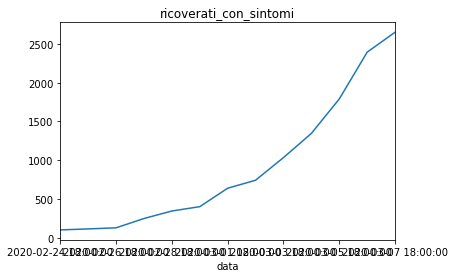

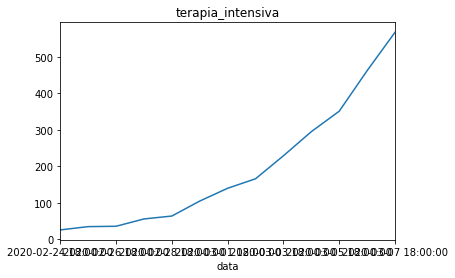

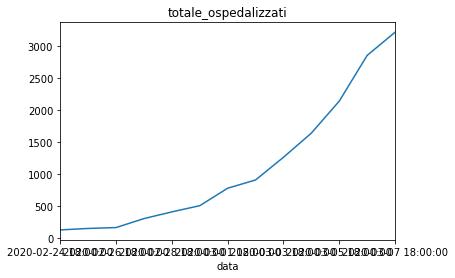

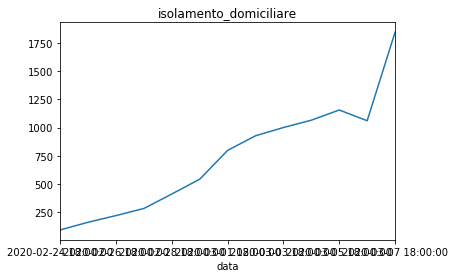

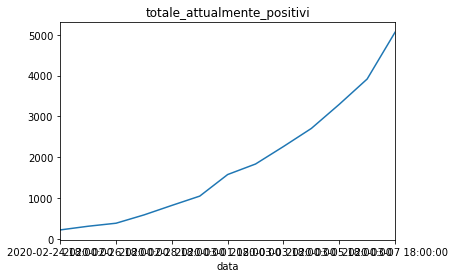

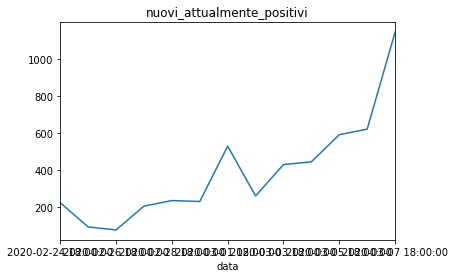

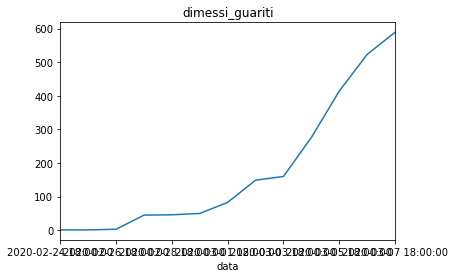

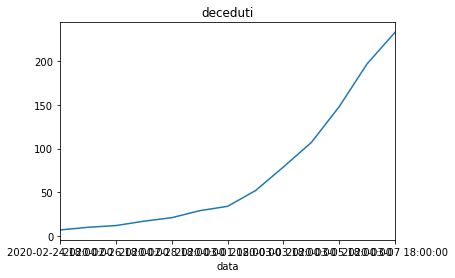

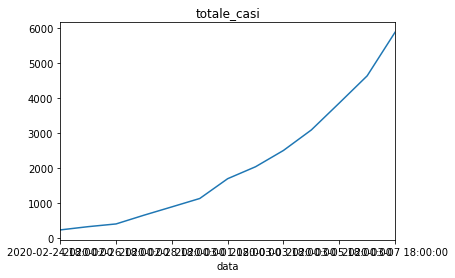

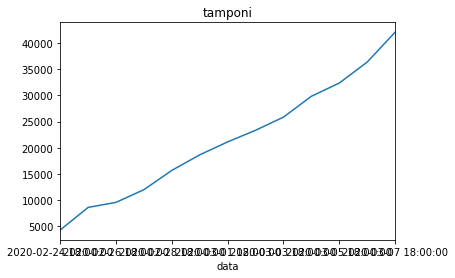

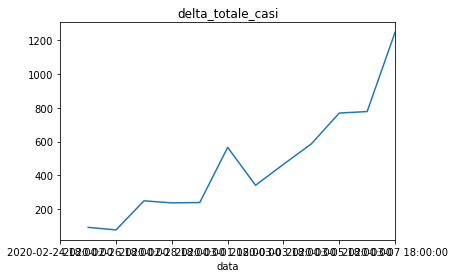

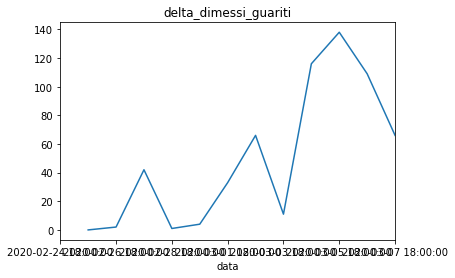

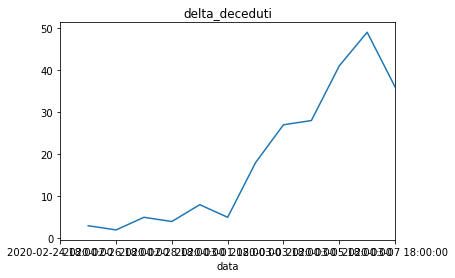

In [49]:
for col in df_naz.columns:
    plt.figure()
    df_naz[col].plot(kind='line', title=col)

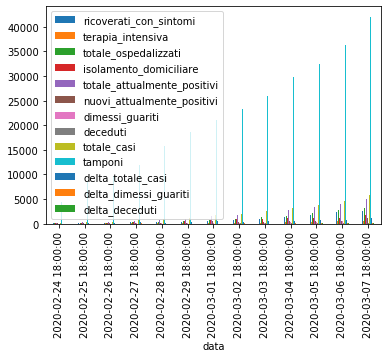

In [50]:
df_naz.plot(kind='bar')

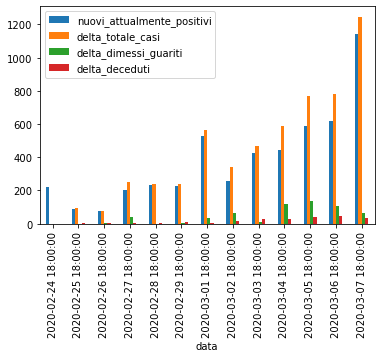

In [51]:
df_naz[['nuovi_attualmente_positivi', 'delta_totale_casi','delta_dimessi_guariti','delta_deceduti']].plot(kind='bar')

### province analysis

In [52]:
province = ['Lodi', 'Milano']
df_prov = pd.read_csv('../dati-province/dpc-covid19-ita-province.csv').set_index('data').drop('stato',1)

In [53]:
df_province = df_prov[df_prov['denominazione_provincia'].isin(province)]
df_province = df_province.pivot_table(index=df_province.index,columns='sigla_provincia', values='totale_casi')

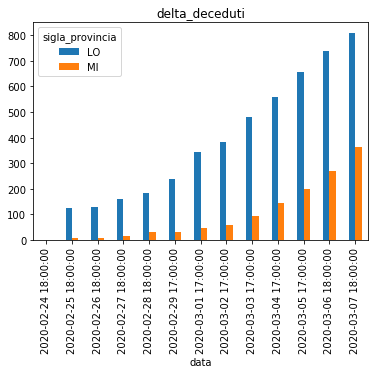

In [54]:
df_province.plot(kind='bar', title=col, legend=True)

### evolution of new cases

In [55]:
df_prov

,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
data,,,,,,,,
2020-02-24 18:00:00,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
2020-02-24 18:00:00,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2020-02-24 18:00:00,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
2020-02-24 18:00:00,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
2020-02-24 18:00:00,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
2020-03-07 18:00:00,5,Veneto,26,Treviso,TV,45.667546,12.245074,110
2020-03-07 18:00:00,5,Veneto,27,Venezia,VE,45.434905,12.338452,100
2020-03-07 18:00:00,5,Veneto,23,Verona,VR,45.438390,10.993527,52


In [56]:
colormap = 'totale_casi'
fig = px.density_mapbox(df_prov, lat='lat', lon='long', z=colormap, radius=10, 
                        hover_name='denominazione_provincia',
                        zoom=5,  height=800,
                        animation_frame=df_prov.index,
                        mapbox_style="stamen-terrain")
fig.show()

### regional analysis

In [57]:
df_reg = pd.read_csv('../dati-regioni/dpc-covid19-ita-regioni.csv')
df_reg.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
268,2020-03-07 18:00:00,ITA,9,Toscana,43.769231,11.255889,54,7.0,61,51,112,34,1,0,113,1331
269,2020-03-07 18:00:00,ITA,4,Trento,46.068935,11.121231,6,1.0,7,7,14,4,0,0,14,194
270,2020-03-07 18:00:00,ITA,10,Umbria,43.106758,12.388247,2,2.0,4,20,24,8,0,0,24,134
271,2020-03-07 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,1,0.0,1,7,8,1,0,0,8,32
272,2020-03-07 18:00:00,ITA,5,Veneto,45.434905,12.338452,123,41.0,164,341,505,51,25,13,543,14429


In [58]:
data = ['ricoverati_con_sintomi','terapia_intensiva','totale_ospedalizzati','isolamento_domiciliare','totale_attualmente_positivi',
        'nuovi_attualmente_positivi','dimessi_guariti','deceduti','totale_casi','tamponi']
colormap = 'isolamento_domiciliare'
fig = px.density_mapbox(df_reg, lat='lat', lon='long', z=colormap, radius=10, 
                        hover_name='denominazione_regione',
                        zoom=3,  height=800,
                        animation_frame='data',
                        mapbox_style="stamen-terrain")
fig.show()